In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/ketak/Desktop/Springboard/capstone ideas/NYSDOH_clean.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed:_0', 'Hospital_Service_Area', 'Hospital_County',
       'Operating_Certificate_Number', 'Permanent_Facility_Id',
       'Facility_Name', 'Age_Group', 'Zip_Code__3_digits', 'Gender', 'Race',
       'Ethnicity', 'Length_of_Stay', 'Type_of_Admission',
       'Patient_Disposition', 'Discharge_Year', 'CCS_Diagnosis_Code',
       'CCS_Diagnosis_Description', 'CCS_Procedure_Code',
       'CCS_Procedure_Description', 'APR_DRG_Code', 'APR_DRG_Description',
       'APR_MDC_Code', 'APR_MDC_Description', 'APR_Severity_of_Illness_Code',
       'APR_Severity_of_Illness_Description', 'APR_Risk_of_Mortality',
       'APR_Medical_Surgical_Description', 'Payment_Typology_1',
       'Payment_Typology_2', 'Payment_Typology_3', 'Birth_Weight',
       'Abortion_Edit_Indicator', 'Emergency_Department_Indicator',
       'Total_Charges', 'Total_Costs',
       'Ratio_of_Total_Costs_to_Total_Charges'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed:_0'],inplace=True)

In [5]:
df['Total_Charges']=df['Total_Charges'].apply(lambda x: float(x.replace(",", "")))

In [6]:
df['Total_Costs']=df['Total_Costs'].apply(lambda x: float(x.replace(",", "")))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236147 entries, 0 to 236146
Data columns (total 36 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             236147 non-null  int64  
 1   Hospital_Service_Area                  236147 non-null  object 
 2   Hospital_County                        236147 non-null  object 
 3   Operating_Certificate_Number           236147 non-null  float64
 4   Permanent_Facility_Id                  236147 non-null  float64
 5   Facility_Name                          236147 non-null  object 
 6   Age_Group                              236147 non-null  object 
 7   Zip_Code__3_digits                     236147 non-null  object 
 8   Gender                                 236147 non-null  object 
 9   Race                                   236147 non-null  object 
 10  Ethnicity                              236147 non-null  

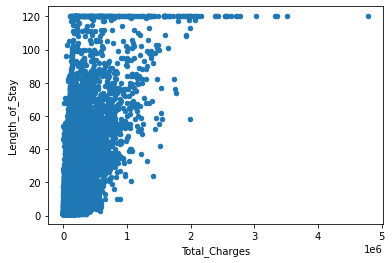

In [8]:
df.plot.scatter(x='Total_Charges',y='Length_of_Stay')
plt.show()

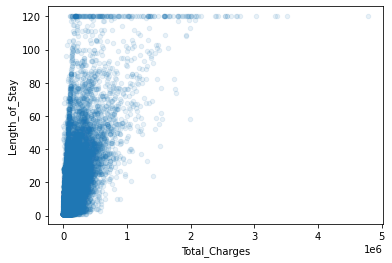

In [9]:
df.plot.scatter(x='Total_Charges',y='Length_of_Stay',alpha=.1)
plt.show()

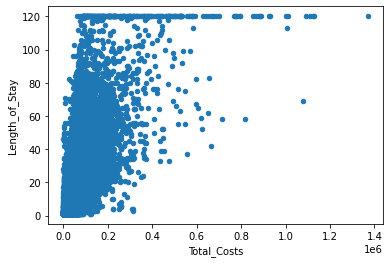

In [10]:
df.plot.scatter(x='Total_Costs',y='Length_of_Stay')
plt.show()

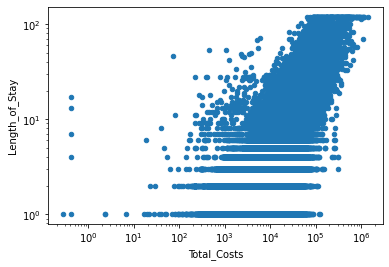

In [11]:
df.plot.scatter(x='Total_Costs',y='Length_of_Stay',loglog=True)
plt.show()

In [13]:
df_county=df[['Hospital_County','Length_of_Stay']]

In [14]:
df_county_grouped=df_county.groupby('Hospital_County').mean()

In [15]:
df_county=df_county_grouped.sort_values('Length_of_Stay')

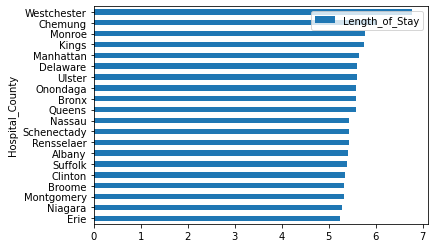

In [16]:
df_county.tail(20).plot(kind='barh')

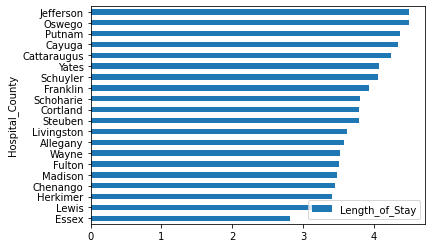

In [17]:
df_county.head(20).plot(kind='barh')

The lowest mean length of stay is in Essex county at liitle more than 2.5 days and the most mean length of stay is at Westchester county more than 6.5 days

In [18]:
df_county.describe()

,Length_of_Stay
count,57.000000
mean,4.750074
std,0.830934
min,2.809524
25%,4.065789
50%,4.906942
75%,5.389008
max,6.784757


In [19]:
df.Operating_Certificate_Number.unique().shape

(182,)

In [20]:
df.Permanent_Facility_Id.unique().shape

(215,)

In [21]:
df.Facility_Name.unique().shape

(228,)

In [22]:
df.Hospital_Service_Area.unique().shape

(8,)

In [23]:
df_facility=df[['Facility_Name','Length_of_Stay']]
df_facility_grouped=df_facility.groupby('Facility_Name').mean()
df_facility_grouped_sorted=df_facility_grouped.sort_values('Length_of_Stay')

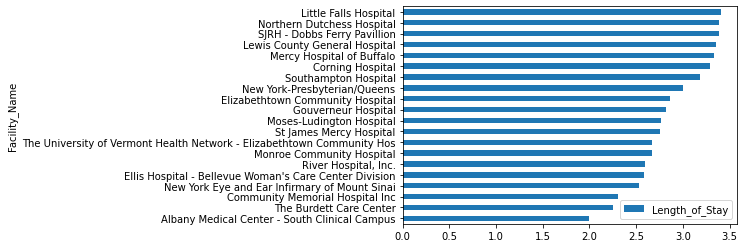

In [24]:
df_facility_grouped_sorted.head(20).plot(kind='barh')

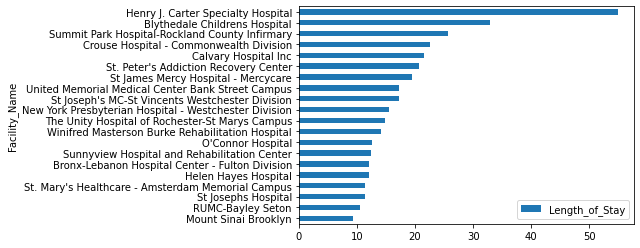

In [25]:
df_facility_grouped_sorted.tail(20).plot(kind='barh')

In [26]:
df_facility_grouped_sorted.describe()

,Length_of_Stay
count,228.000000
mean,6.178128
std,5.008153
min,2.000000
25%,4.228729
50%,4.973802
75%,6.186719
max,54.916667


In [27]:
df_outlier=df_facility_grouped_sorted[df_facility_grouped_sorted.Length_of_Stay>=10]

In [28]:
print(df_outlier)

                                                    Length_of_Stay
Facility_Name                                                     
RUMC-Bayley Seton                                        10.487500
St Josephs Hospital                                      11.384393
St. Mary's Healthcare - Amsterdam Memorial Campus        11.454545
Helen Hayes Hospital                                     12.085714
Bronx-Lebanon Hospital Center - Fulton Division          12.129590
Sunnyview Hospital and Rehabilitation Center             12.435185
O'Connor Hospital                                        12.500000
Winifred Masterson Burke Rehabilitation Hospital         14.050980
The Unity Hospital of Rochester-St Marys Campus          14.744186
New York Presbyterian Hospital - Westchester Di...       15.516199
St Joseph's MC-St Vincents Westchester Division          17.161491
United Memorial Medical Center Bank Street Campus        17.166667
St James Mercy Hospital - Mercycare                      19.40

In [29]:
df_lowvalues=df_facility_grouped_sorted[df_facility_grouped_sorted.Length_of_Stay<=3]


In [30]:
print(df_lowvalues)

                                                    Length_of_Stay
Facility_Name                                                     
Albany Medical Center - South Clinical Campus             2.000000
The Burdett Care Center                                   2.257511
Community Memorial Hospital Inc                           2.300699
New York Eye and Ear Infirmary of Mount Sinai             2.528302
Ellis Hospital - Bellevue Woman's Care Center D...        2.581105
River Hospital, Inc.                                      2.600000
Monroe Community Hospital                                 2.666667
The University of Vermont Health Network - Eliz...        2.666667
St James Mercy Hospital                                   2.760000
Moses-Ludington Hospital                                  2.764706
Gouverneur Hospital                                       2.823529
Elizabethtown Community Hospital                          2.863636
New York-Presbyterian/Queens                              3.00

,Length_of_Stay
count,8.000000
mean,5.380569
std,0.279931
min,5.068794
25%,5.162208
50%,5.326472
75%,5.558734
max,5.869101


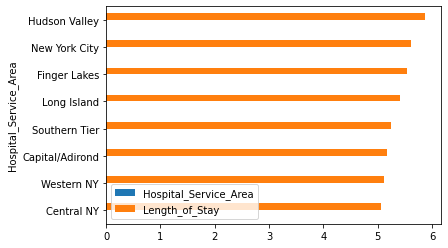

In [31]:
df_servicearea=pd.DataFrame(df.groupby('Hospital_Service_Area').Length_of_Stay.mean(),columns=('Hospital_Service_Area','Length_of_Stay'))
df_servicearea=df_servicearea.sort_values('Length_of_Stay')
df_servicearea.plot(kind='barh')
df_servicearea.describe()

,Length_of_Stay
count,5.000000
mean,5.234384
std,1.039617
min,3.992414
25%,4.607939
50%,4.983031
75%,6.096282
max,6.492256


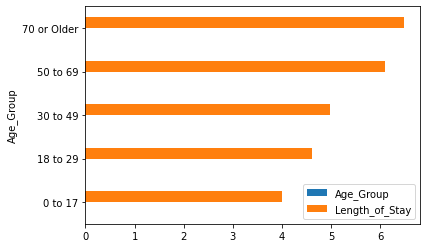

In [32]:
df_agegroup=pd.DataFrame(df.groupby('Age_Group').Length_of_Stay.mean(),columns=('Age_Group','Length_of_Stay'))
df_agegroup=df_agegroup.sort_values('Length_of_Stay')
df_agegroup.plot(kind='barh')
df_agegroup.describe()

In [33]:
df.Zip_Code__3_digits.unique().shape

(51,)

,Length_of_Stay
count,51.000000
mean,5.444038
std,0.490541
min,4.688165
25%,5.122078
50%,5.347367
75%,5.724928
max,7.015134


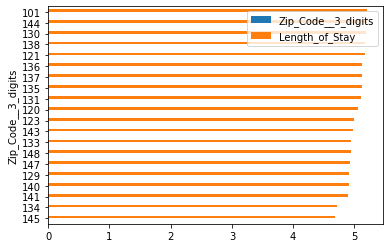

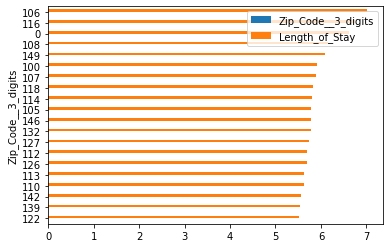

In [34]:
df_zipcode=pd.DataFrame(df.groupby('Zip_Code__3_digits').Length_of_Stay.mean(),columns=('Zip_Code__3_digits','Length_of_Stay'))
df_zipcode=df_zipcode.sort_values('Length_of_Stay')
df_zipcode.head(20).plot(kind='barh')
df_zipcode.tail(20).plot(kind='barh')
df_zipcode.describe()

,Length_of_Stay
count,3.000000
mean,4.701916
std,1.533513
min,3.000000
25%,4.064733
50%,5.129465
75%,5.552873
max,5.976281


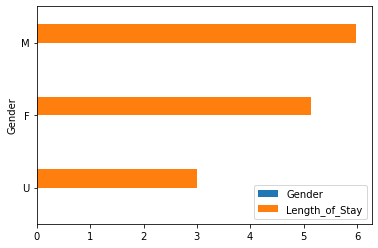

In [35]:
df_gender=pd.DataFrame(df.groupby('Gender').Length_of_Stay.mean(),columns=('Gender','Length_of_Stay'))
df_gender=df_gender.sort_values('Length_of_Stay')
df_gender.plot(kind='barh')
df_gender.describe()

,Length_of_Stay
count,4.000000
mean,5.610376
std,0.410515
min,5.189697
25%,5.359306
50%,5.554267
75%,5.805337
max,6.143272


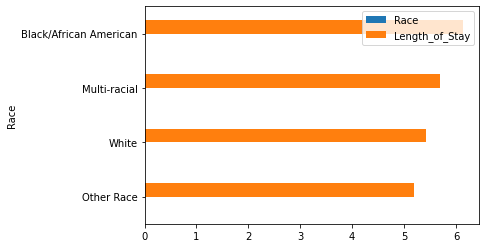

In [36]:
df_race=pd.DataFrame(df.groupby('Race').Length_of_Stay.mean(),columns=('Race','Length_of_Stay'))
df_race=df_race.sort_values('Length_of_Stay')
df_race.plot(kind='barh')
df_race.describe()

,Length_of_Stay
count,4.000000
mean,5.610376
std,0.410515
min,5.189697
25%,5.359306
50%,5.554267
75%,5.805337
max,6.143272


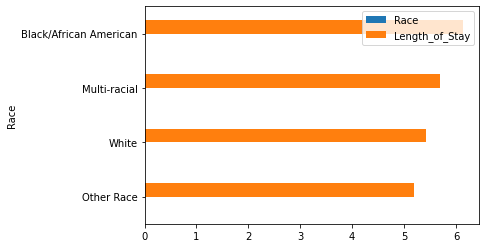

In [37]:
df_ethnicity=pd.DataFrame(df.groupby('Ethnicity').Length_of_Stay.mean(),columns=('Ethnicity','Length_of_Stay'))
df_ethnicity=df_race.sort_values('Length_of_Stay')
df_ethnicity.plot(kind='barh')
df_ethnicity.describe()

,Length_of_Stay
count,6.000000
mean,5.273317
std,0.993654
min,3.703994
25%,4.777413
50%,5.439003
75%,6.054103
max,6.241883


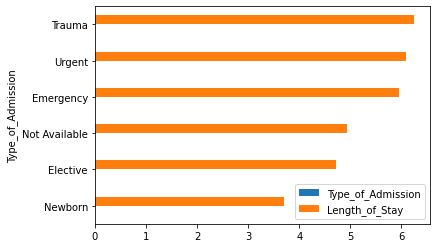

In [38]:
df_adm=pd.DataFrame(df.groupby('Type_of_Admission').Length_of_Stay.mean(),columns=('Type_of_Admission','Length_of_Stay'))
df_adm=df_adm.sort_values('Length_of_Stay')
df_adm.plot(kind='barh')
df_adm.describe()

,Length_of_Stay
count,19.000000
mean,8.158753
std,3.066453
min,2.934342
25%,6.002777
50%,7.933535
75%,10.257155
max,14.689655


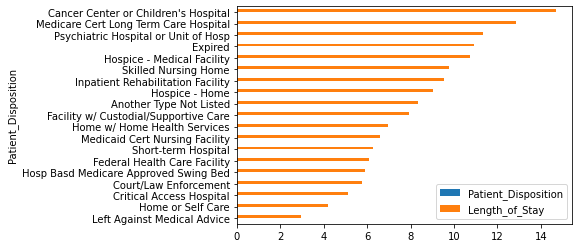

In [39]:
df_pdisp=pd.DataFrame(df.groupby('Patient_Disposition').Length_of_Stay.mean(),columns=('Patient_Disposition','Length_of_Stay'))
df_pdisp=df_pdisp.sort_values('Length_of_Stay')
df_pdisp.plot(kind='barh')
df_pdisp.describe()

In [48]:
df.CCS_Diagnosis_Code.unique().shape

(258,)

,Length_of_Stay
count,258.000000
mean,5.749225
std,3.651308
min,1.000000
25%,3.451301
50%,4.885802
75%,6.817384
max,32.909091


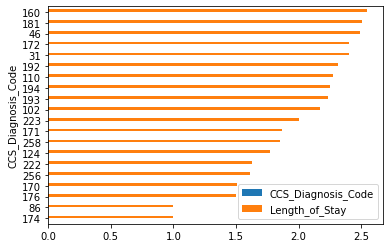

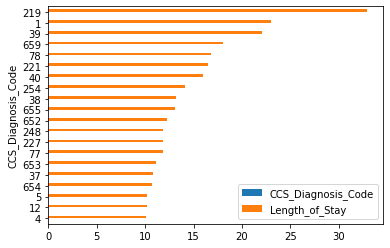

In [50]:
df_ccsdiagcode=pd.DataFrame(df.groupby('CCS_Diagnosis_Code').Length_of_Stay.mean(),columns=('CCS_Diagnosis_Code','Length_of_Stay'))
df_ccsdiagcode=df_ccsdiagcode.sort_values('Length_of_Stay')
df_ccsdiagcode.head(20).plot(kind='barh')
df_ccsdiagcode.tail(20).plot(kind='barh')                 
df_ccsdiagcode.describe()

In [52]:
df.CCS_Diagnosis_Description.unique().shape

(258,)

,Length_of_Stay
count,258.000000
mean,5.749225
std,3.651308
min,1.000000
25%,3.451301
50%,4.885802
75%,6.817384
max,32.909091


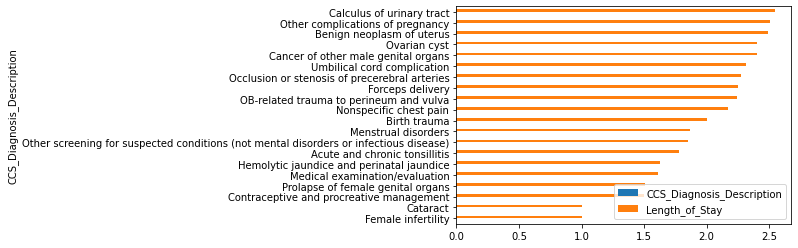

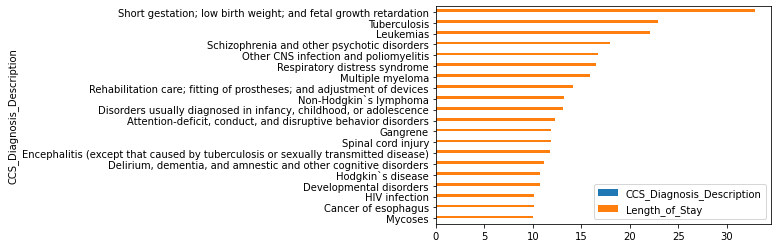

In [53]:
df_ccsdiagdesc=pd.DataFrame(df.groupby('CCS_Diagnosis_Description').Length_of_Stay.mean(),columns=('CCS_Diagnosis_Description','Length_of_Stay'))
df_ccsdiagdesc=df_ccsdiagdesc.sort_values('Length_of_Stay')
df_ccsdiagdesc.head(20).plot(kind='barh')
df_ccsdiagdesc.tail(20).plot(kind='barh')                 
df_ccsdiagdesc.describe()

In [54]:
df.CCS_Procedure_Code.unique().shape

(227,)

,Length_of_Stay
count,227.000000
mean,6.793957
std,4.900731
min,1.543478
25%,4.041769
50%,5.726257
75%,8.191443
max,41.072193


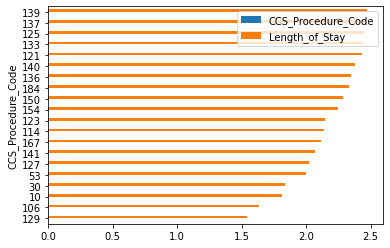

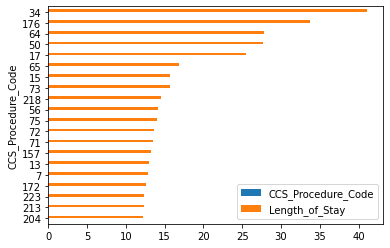

In [55]:
df_ccsproccode=pd.DataFrame(df.groupby('CCS_Procedure_Code').Length_of_Stay.mean(),columns=('CCS_Procedure_Code','Length_of_Stay'))
df_ccsproccode=df_ccsproccode.sort_values('Length_of_Stay')
df_ccsproccode.head(20).plot(kind='barh')
df_ccsproccode.tail(20).plot(kind='barh')                 
df_ccsproccode.describe()

In [57]:
df.CCS_Procedure_Description.unique().shape

(227,)

,Length_of_Stay
count,227.000000
mean,6.793957
std,4.900731
min,1.543478
25%,4.041769
50%,5.726257
75%,8.191443
max,41.072193


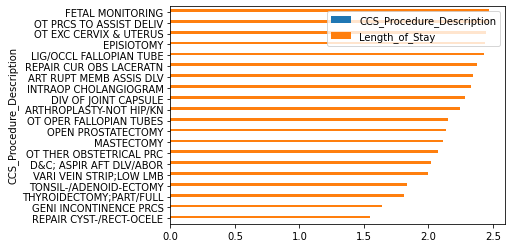

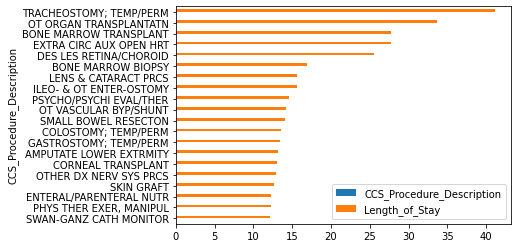

In [58]:
df_ccsprocdesc=pd.DataFrame(df.groupby('CCS_Procedure_Description').Length_of_Stay.mean(),columns=('CCS_Procedure_Description','Length_of_Stay'))
df_ccsprocdesc=df_ccsprocdesc.sort_values('Length_of_Stay')
df_ccsprocdesc.head(20).plot(kind='barh')
df_ccsprocdesc.tail(20).plot(kind='barh')                 
df_ccsprocdesc.describe()

In [69]:
def plotbar(x):
    dfh=pd.DataFrame(df.groupby(x).Length_of_Stay.mean(),columns=(x,'Length_of_Stay'))
    dfh=dfh.sort_values('Length_of_Stay')
    dfh.describe()
    dfh.head(20).plot(kind='barh')
    dfh.tail(20).plot(kind='barh')                 
    print(dfh.describe())

       Length_of_Stay
count      312.000000
mean         8.723337
std         10.710373
min          1.162162
25%          3.829113
50%          5.644584
75%          8.964960
max         79.333333


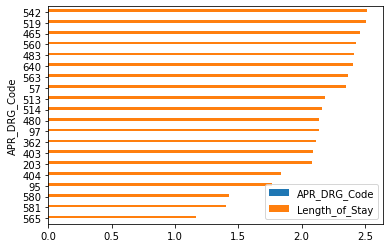

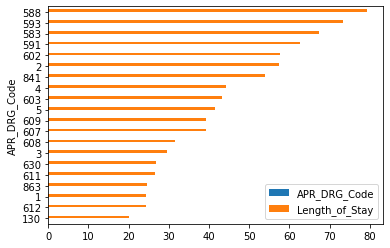

In [70]:
plotbar('APR_DRG_Code')

       Length_of_Stay
count      312.000000
mean         8.723337
std         10.710373
min          1.162162
25%          3.829113
50%          5.644584
75%          8.964960
max         79.333333


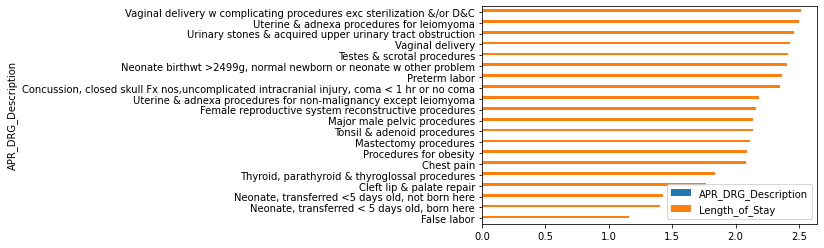

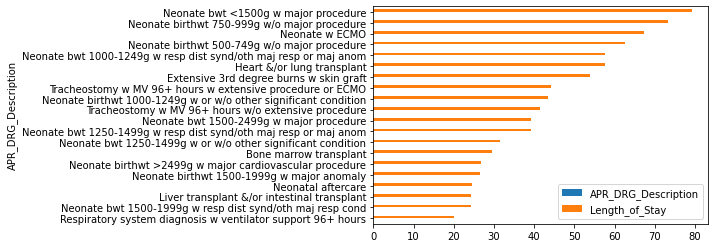

In [71]:
plotbar('APR_DRG_Description')

       Length_of_Stay
count       25.000000
mean         6.153028
std          2.818868
min          2.927048
25%          3.952615
50%          5.196888
75%          7.757009
max         12.721838


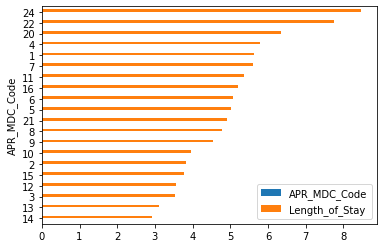

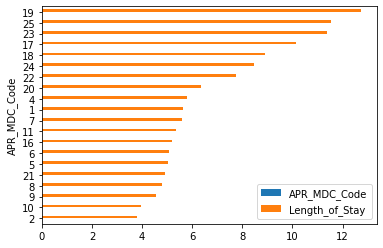

In [72]:
plotbar('APR_MDC_Code')

       Length_of_Stay
count       25.000000
mean         6.153028
std          2.818868
min          2.927048
25%          3.952615
50%          5.196888
75%          7.757009
max         12.721838


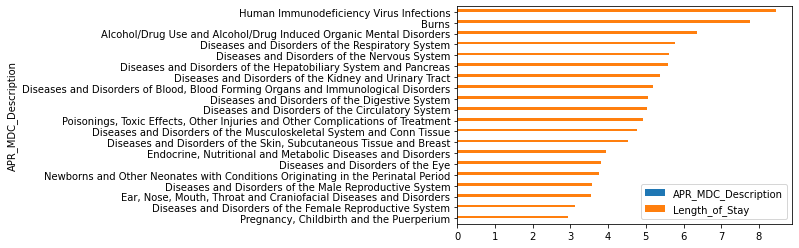

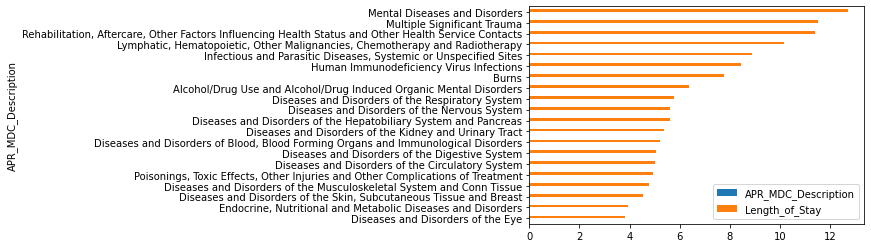

In [73]:
plotbar('APR_MDC_Description')

       Length_of_Stay
count        4.000000
mean         7.969988
std          5.845339
min          3.100474
25%          4.475373
50%          6.239638
75%          9.734254
max         16.300203


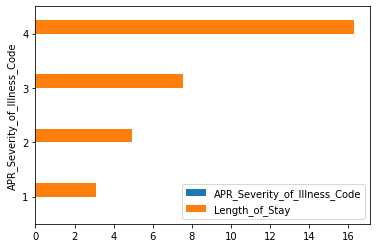

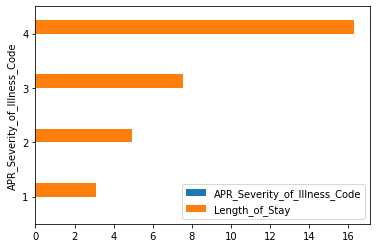

In [75]:
plotbar('APR_Severity_of_Illness_Code')

In [ ]:
 'APR_Severity_of_Illness_Description', 'APR_Risk_of_Mortality',
       'APR_Medical_Surgical_Description', 'Payment_Typology_1',
       'Payment_Typology_2', 'Payment_Typology_3', 'Birth_Weight',
       'Abortion_Edit_Indicator', 'Emergency_Department_Indicator',
       'Total_Charges', 'Total_Costs',
       'Ratio_of_Total_Costs_to_Total_Charges'

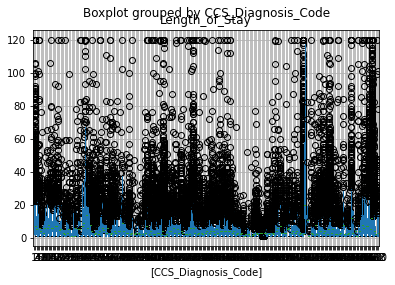

In [44]:
plotbar('APR_Severity_of_Illness_Description')

       Length_of_Stay
count        4.000000
mean         8.203280
std          4.603892
min          4.062325
25%          5.260696
50%          7.118067
75%         10.060651
max         14.514663


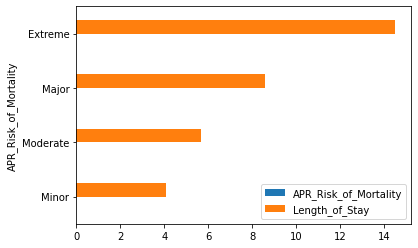

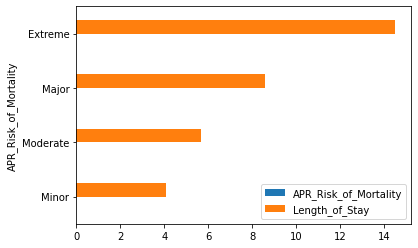

In [76]:
plotbar('APR_Risk_of_Mortality')

       Length_of_Stay
count        2.000000
mean         5.675162
std          0.461014
min          5.349176
25%          5.512169
50%          5.675162
75%          5.838155
max          6.001148


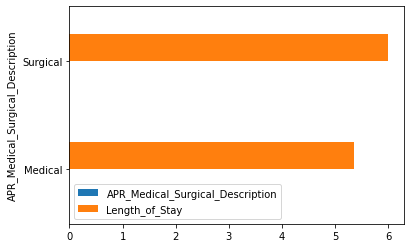

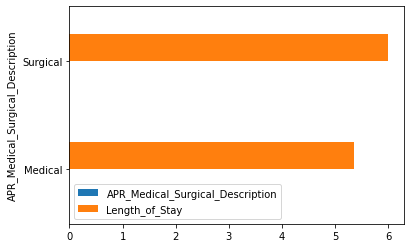

In [77]:
plotbar('APR_Medical_Surgical_Description')

       Length_of_Stay
count       10.000000
mean         5.468769
std          1.452166
min          4.148017
25%          4.362698
50%          4.974255
75%          6.175157
max          8.742857


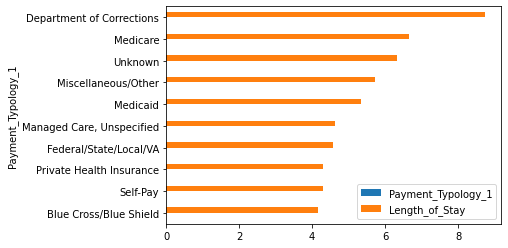

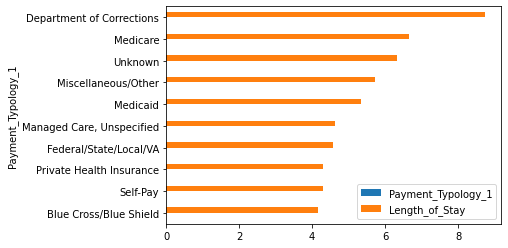

In [78]:
plotbar('Payment_Typology_1')

       Length_of_Stay
count       10.000000
mean         5.821628
std          0.734015
min          4.915440
25%          5.111952
50%          5.925902
75%          6.245021
max          6.977778


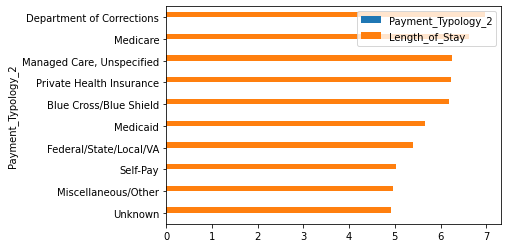

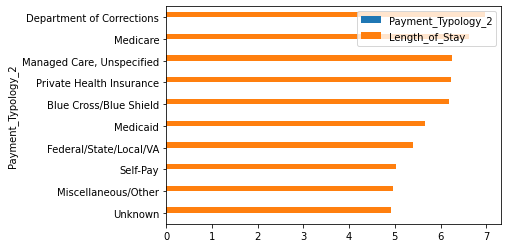

In [79]:
plotbar('Payment_Typology_2')

       Length_of_Stay
count       10.000000
mean         6.224625
std          0.805207
min          5.000000
25%          5.686948
50%          6.180542
75%          6.670953
max          7.389610


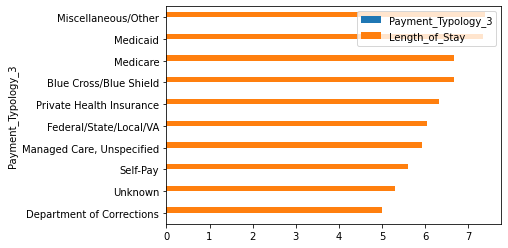

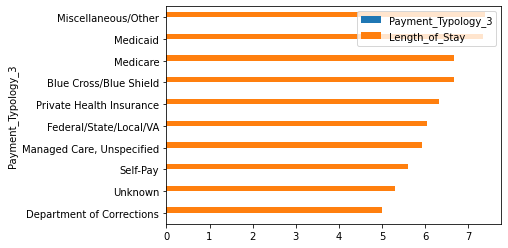

In [80]:
plotbar('Payment_Typology_3')

       Length_of_Stay
count       56.000000
mean        15.395694
std         21.826680
min          1.000000
25%          2.640694
50%          3.092901
75%         16.499173
max         79.500000


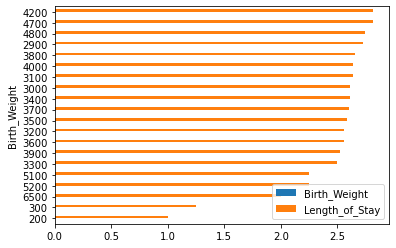

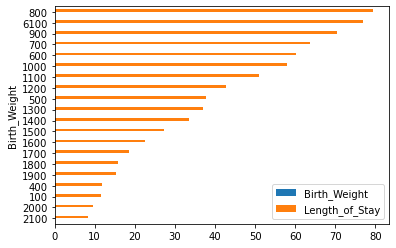

In [81]:
plotbar('Birth_Weight')

       Length_of_Stay
count        2.000000
mean         5.444036
std          0.530575
min          5.068862
25%          5.256449
50%          5.444036
75%          5.631622
max          5.819209


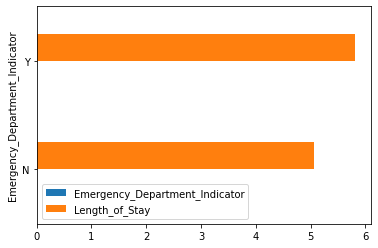

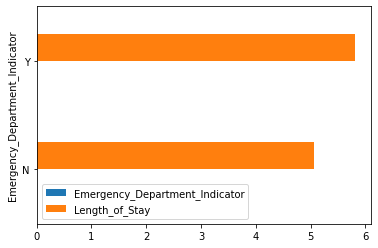

In [82]:
plotbar('Emergency_Department_Indicator')